# 🧪 Notebook 5 – Proceso ETL Completo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. EXTRACT – Cargar los datos

In [3]:
df = pd.read_csv("data/datos.csv")
print("📂 Datos extraídos:")
df.head()

📂 Datos extraídos:


,nombre,ventas
0,Alondra Guillén Fuertes,1110
1,Flor Amigó,778
2,Toño Pinto Domínguez,error
3,Esteban Tenorio Acero,error
4,Marita Guardiola Company,1469


## 2. TRANSFORM – Limpieza y Clasificación

In [4]:

df["ventas"] = pd.to_numeric(df["ventas"], errors="coerce")
df_clean = df.dropna(subset=["nombre", "ventas"])

def clasificar_ventas(v):
    if v >= 1500:
        return "Excelente"
    elif v >= 1000:
        return "Bueno"
    else:
        return "Mejorable"

df_clean["clasificacion"] = df_clean["ventas"].apply(clasificar_ventas)
df_clean.head()


C:\Users\PC MASTER\AppData\Local\Temp\ipykernel_42224\1891339375.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["clasificacion"] = df_clean["ventas"].apply(clasificar_ventas)


,nombre,ventas,clasificacion
0,Alondra Guillén Fuertes,1110.0,Bueno
1,Flor Amigó,778.0,Mejorable
4,Marita Guardiola Company,1469.0,Bueno
10,Virginia Andres Goñi,910.0,Mejorable
11,Anna Benito Cardona,1727.0,Excelente


## 3. LOAD – Guardar resultados

In [5]:

df_clean.to_csv("data/completo/ventas_limpias_etl.csv", index=False)
df_clean.to_excel("data/completo/ventas_limpias_etl.xlsx", index=False)


## 4. ANÁLISIS – Visualización y estadísticas

📊 Clasificación:
clasificacion
Bueno        15
Excelente    11
Mejorable     9
Name: count, dtype: int64

📈 Estadísticas:
count      35.000000
mean     1296.400000
std       357.747298
min       607.000000
25%      1038.500000
50%      1343.000000
75%      1574.500000
max      1857.000000
Name: ventas, dtype: float64


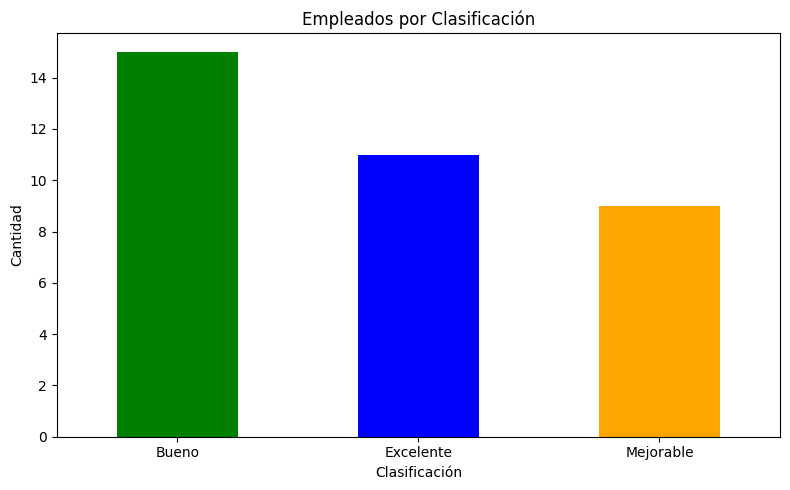

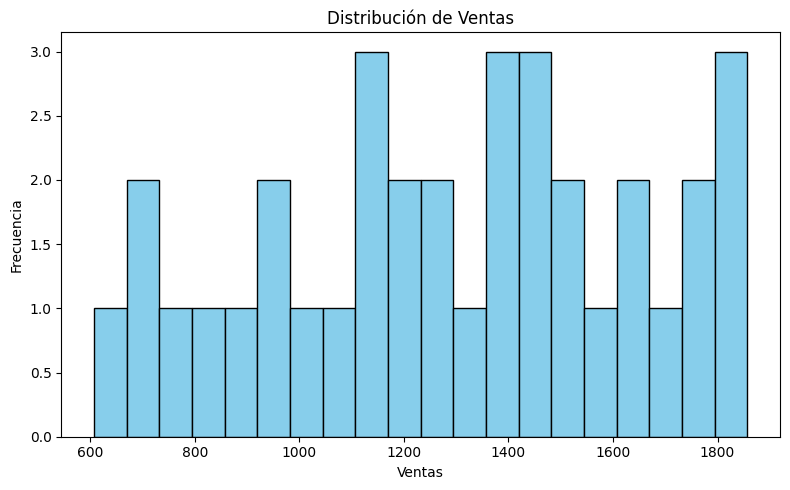

In [6]:

print("📊 Clasificación:")
print(df_clean["clasificacion"].value_counts())

print("\n📈 Estadísticas:")
print(df_clean["ventas"].describe())

# Gráfico de barras
plt.figure(figsize=(8, 5))
df_clean["clasificacion"].value_counts().plot(kind="bar", color=["green", "blue", "orange"])
plt.title("Empleados por Clasificación")
plt.xlabel("Clasificación")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df_clean["ventas"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribución de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


## ✅ Conclusión

Este notebook ejecuta un flujo ETL completo con visualización de resultados.